# Lineare Regression Beispiel 2 - Advertising

Eine Firma hat einige Werbespots und Anzeigen für TV, Radio und Zeitung produziert. Um die Performance der Werbung zu steigern und Kosten zu minimieren, wirst du damit beauftragt eine möglichst effiziente Planung aufzustellen.

## Requirements

Dieses Beispiel entstammt dem begleitenden Lehrbuch [An Introduction to Statistical Learning](https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf) und dem dazugehörigen Datensatz _Advertising.csv_. Diesen kannst du dir [hier](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) herunterladen.

Du solltest die Bibliotheken Pandas, Numpy, Seaborn, Matplotlib und ScikitLearn installiert haben.

## Intro

Wie einleitend bereits erwähnt wird Werbung geschaltet. Da diese Werbung Geld kostet und nicht jedes Medium gleichermaßen funktioniert, muss ermittelt werden welchem Medium welche Aufmerksamkeit gewipnet wird.

## Datainput

Als Datenquelle wird die Datei `Advertising.csv` aus dem lokalen Verzeichnis `data` genutzt. Falls du die csv nicht verfügbar hast, kannst du sie [hier](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) herunterladen.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# index_col=0 ist ein optionaler Parameter. Die CSV verfügt bereits über eine Nummerierung.
# um hier keine doppelte Nummerierung zu haben, wird der Index festgelegt.
# Das hat keine Auswirkung auf weiteres vorgehen.
# Du kannst index_col=0 mal entfernen und schauen wie es ohne aussieht.
advertising_df = pd.read_csv('data/Advertising.csv', index_col=0)
advertising_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Datenaufbereitung und Verständnis

In [3]:
# Gibt Dimension der Tabelle als Tupel an
# Anzahl der Reihen (exklusive header), Anzahl der Spalten (exclusive Indexspalte)

advertising_df.shape

(200, 4)

In [4]:
# Spaltenbezeichungen

advertising_df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
# Typisierung
# **WICHTIG** es ist eine initiale typisierung von Pandas und muss nicht immer stimmen

advertising_df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
# Nullwerte
# In diesem Datensatz sind keine Nullwerte vorhanden.
# Wäre etwas anderes der Fall, müsste überlegt werden, wie damit umgegangen wird.

for column in advertising_df.columns:
    none_values = advertising_df[str(column)].isna().sum()
    print(f"Nullwerte {column}: {none_values}")

Nullwerte TV: 0
Nullwerte radio: 0
Nullwerte newspaper: 0
Nullwerte sales: 0


In [7]:
print(f"Minimaler Sales Wert: {advertising_df['sales'].min()}")
print(f"Maximaler Sales Wert: {advertising_df['sales'].max()}")
print(f"Durchschnittlicher Sales Wert: {advertising_df['sales'].mean()}")

Minimaler Sales Wert: 1.6
Maximaler Sales Wert: 27.0
Durchschnittlicher Sales Wert: 14.0225


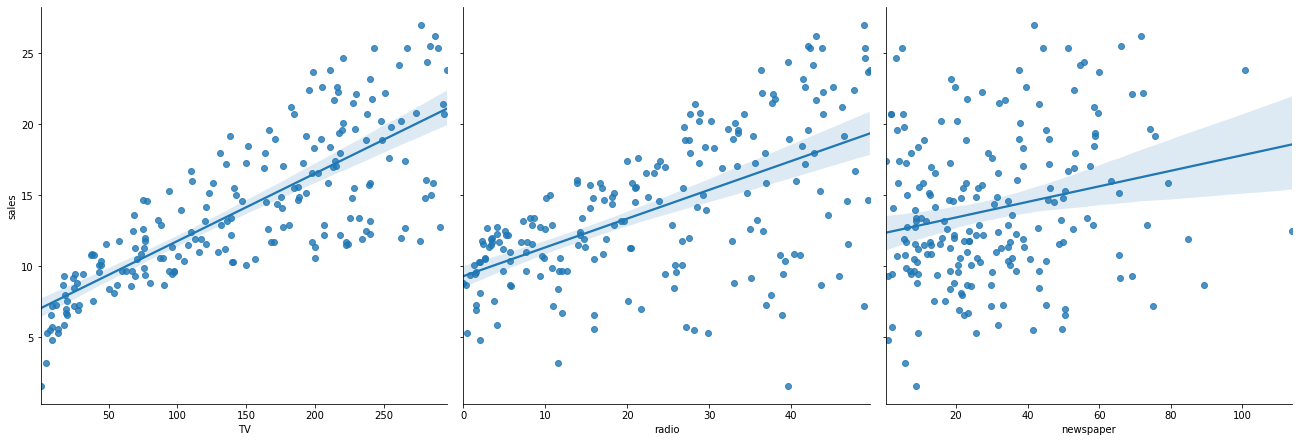

In [8]:
# Scatter-Regressionsplot
# es wird visuell deutlich welche Features sich zur Regression eignen

sns.pairplot(
    x_vars=['TV', 'radio', 'newspaper'],
    y_vars='sales',
    data=advertising_df,
    height=6,
    kind='reg'
)

## Modellierung

### Dataframe in Trainings und Testdaten splitten

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
feature_cols = ['TV', 'radio', 'newspaper']

In [11]:
X = advertising_df[feature_cols]

In [12]:
target_col = 'sales'

In [13]:
y = advertising_df[target_col]

In [14]:
# Default Split: 75% Training - 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Lineare Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Lineare Regression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Vorhersage der Testdaten

y_pred = regr.predict(X_test)

In [18]:
print('Mittlere quadratische Abweichung: %.2f' % mean_squared_error(y_test, y_pred))
print('Determinationskoeffizient (Bestimmtheitsmaß): %.2f' % r2_score(y_test, y_pred))

Mittlere quadratische Abweichung: 1.97
Determinationskoeffizient (Bestimmtheitsmaß): 0.92


### Output

#### Fragestellung 1 - Welche Sales werden bei einer beliebigen Konfiguration aus Werbeanzeigen in den gegebenen Medien erwartungsgemäß definiert?

In [19]:
# Wähle eine Beliebige Konfiguration

X_q_1 = [[145.5, 39.5, 67.1]]

In [20]:
# Erstelle die Prognose

y_q_1 = regr.predict(X_q_1)
print(
    f"Zu den Werten \
    TV: {X_q_1[0][0]}, \
    radio: {X_q_1[0][1]}, \
    newspaper: {X_q_1[0][2]} \
    \nwird folgender Sales-Wert erwartet: {round(y_q_1[0],4)} +- {round(mean_squared_error(y_test, y_pred),4)}"
)

Zu den Werten     TV: 145.5,     radio: 39.5,     newspaper: 67.1     
wird folgender Sales-Wert erwartet: 16.9604 +- 1.973


## Quellen für dieses Notebook:

- https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf
- http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
- https://www.youtube.com/watch?v=JJaNjjRWZXw
- https://www.youtube.com/watch?v=IsRRvEoIQ4k
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html